In [1]:
cd ../..

D:\Users\mrefoyo\Proyectos\Sub-SpaCE_plus


In [2]:
import os
import pickle
import json
import copy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import tensorflow as tf

from experiments.evaluation.evaluation_utils import load_dataset_for_eval, calculate_metrics_for_dataset, calculate_method_valids

print(tf.__version__)

2.13.0


In [33]:
# datasets = ['CBF', 'chinatown', 'coffee', 'gunpoint', 'ECG200']
DATASETS = [
    "BasicMotions", "NATOPS", "UWaveGestureLibrary",
    'ArticularyWordRecognition', 'Cricket', 'Epilepsy', 'PenDigits', 
    # 'PEMS-SF',
    'RacketSports', 'SelfRegulationSCP1'
]
model_to_explain = "cls_basic_train"
osc_names = {"AE": "ae_basic_train", "IF": "if_basic_train", "LOF": "lof_basic_train"}
methods = {
    # Basic experimentos
    # "43b17a2e4f21097540adf8600402c5bd32fa60d6": "subspace_gknn_gch",
    # "37a3f06c077321b95960769282152427a7ee48ae": "subspace_gknn_ich", 
    # "86df14d56b66fecfb65d5805107dfe10961ecae9": "subspace_iknn_gch",     
    # "4f40e39bfe0d3da692b5571d87f7ec915c42eba2": "subspace_iknn_ich", 
    
    # Basic experiments only gknn but with lower gamma (0.125)
    # "4d1faa458bab2b8c6ee14d59b824557fcc80d8e3": "subspace_gknn_gch_gamma0125", 
    # "93c0b5f0630a5dbf5d0377a4f3ff03b6868cbda1": "subspace_iknn_gch_gamma0125", 
    
    # Basic experiments New IoS 
    # "e54dcb25b02132166a719885cad2695540450ee6": "subspace_gknn_gch_ios",
    # "9cdb2fb25d7c664d60da7aa23b4c2c0f9ec9548c": "subspace_gknn_ich_ios",
    # "8c29354f168b9852a05523a7c26ab0f4acb30e9b": "subspace_iknn_gch_ios",
    # "b93fe63854fe36f62900cbcae1c00ad499d41f74": "subspace_iknn_ich_ios",
    
    # Sub-SpaCE v2 con NUN sinteticos
    # "0f31693cb3d17afd3d67191e82e2bca887075ee6": "subspace_gknn_gch_moremut",
    # "988e9ee7e36478e6b02628f6fd15e8f6fdabce63": "subspace_iknn_gch_moremut",
    # "a246def090b506ff8ba41e861e0464493233b9d1": "subspace_gknn_ich_moremut",
    # "de59140e133b8214d6fd39630d49420f41f2f395": "subspace_iknn_ich_moremut",
    # "e4a8da55a30853287350d3540873bcb91cb50b70": "subspace_gknn_cch_moremut",
    # "af3bb75a4e9d84bc4cb545b21941e6750ce17b45": "subspace_iknn_cch_moremut",
    
    # Sub-SpaCE v2 mutation study
    # "a39f776a35cfd7c4530ed4c8f104fcef9b650512": "subspace_gknn_ich_mut01",
    # "99b876d673ecb07aa65860859a2f6467617b8c86": "subspace_gknn_gch_mut01",
    # "7469da9fdf840b4b4c2b38bc4bc9111016b32de5": "subspace_gknn_cch_mut01",
    # "db736bc9c4068ecbfbc96a90e98dc0eb3efbaa92": "subspace_gknn_ich_mut02",
    # "cbbcedcb6d9fd15f864bcc72209e990664f578cc": "subspace_gknn_gch_mut02",
    # "3a2f5d028e5e5ee1637634010ddab48db711879f": "subspace_gknn_cch_mut02",
    # "e702bb244e58da0e7ebbc277bb04c45fb09118aa": "subspace_gknn_ich_mut04",
    # "5643e1c660ae69f41f58f9b71109809ac41d806a": "subspace_gknn_gch_mut04",
    # "d3103c82728b7e2d32be72d2c3029c225869b952": "subspace_gknn_cch_mut04",
    # "6a1225fc4657ca27a9d23ed21050b2fb890175c3": "subspace_gknn_ich_mut05",
    # "41f42efc9de796a8dafc08265dc029d606e452cf": "subspace_gknn_gch_mut05",
    # "2a7b2e8d4df37d7d7ece4e9b45999a3679252362": "subspace_gknn_cch_mut05",
    # "14f1a162dc03f18a16cb1044efd076f3a4fb61a2": "subspace_gknn_ich_mut07",
    # "e76bb3c93b88f711dd5d25a3ac5704c3bf98b4cf": "subspace_gknn_gch_mut07",
    # "e58d4a60e2c54feed0add715c4c3b28afbb37969": "subspace_gknn_cch_mut07",
    # "6d734428c0fea87d3327bea1408b47c483d33e9e": "subspace_gknn_ich_mut09",
    # "e347534c7eb328d5ddafe940f724a02f9a14ec80": "subspace_gknn_gch_mut09",
    # "b945f3452ca7deb539f84c45d6c6202e75563c55": "subspace_gknn_cch_mut09",
    
    # Comparison between FI initializations 
    # "d0150639d9caf9cbaa8503c4ad0e6b2ad0f146f5": "subspace_gknn_cch_finone",
    # "abd6be72d2e5c0967af2134fe463ff2ad9250524": "subspace_gknn_cch_figradcam",
    # "4d454643cf2a5a5fd244b515e49025a40a3865a3": "subspace_gknn_cch_fiIG",
    # "94b9fe1099b1177bd2438f8a822ba50796620e17": "subspace_gknn_cch_fiSG",

    # New comparison between initializations with MO
    # "827e5a1dcdef171654915c3a6044f696b45907f5": "multisubspace_gknn_75_0_25_fi_none",
    # "be4d9b4ba2ab19d5089defeb5d1e10f5ab372b65": "multisubspace_gknn_75_0_25_fi_gradcam",

    # New mutation experiments (fi none)
    # "98115f1aa11842ba52440c2efcae5b9f5dad10f2": "multisubspace_gknn_75_0_25_mut01",
    # "afd19a8e19ebb2a3aa36f377a7ed81f0c2d55f16": "multisubspace_gknn_75_0_25_mut02",
    # "1cf037d1e4512683b378b90ee9345de26d09def6": "multisubspace_gknn_75_0_25_mut03",
    # "e04c4795bf5b47b47d660f78ff50f2038e16fdfd": "multisubspace_gknn_75_0_25_mut04",
    # "2f59f6a9fb383e5e87357b4c64b422836b2921a6": "multisubspace_gknn_75_0_25_mut05",
    # "565064e37e308e5881221745d22763d8fa51b37a": "multisubspace_gknn_75_0_25_mut06",
    # "9c3070b31c45e8f9197e4fb4f62e9e02cb687b45": "multisubspace_gknn_75_0_25_mut07",
    # "d06c42645d15ba3573722b600ebbf593455ef748": "multisubspace_gknn_75_0_25_mut08",
    # "e87b5e0754f69e5d00651bc87a34567cf82fe6e3": "multisubspace_gknn_75_0_25_mut09",

    # New mutation experiments pruning (fi none)
    # "19f0de6299f82c9ab47d1d46c6ea83ee54dfe691": "multisubspace_gknn_75_0_25_prmut005",
    # "4aafe4d4ccb244b2446d66b8608600205b942787": "multisubspace_gknn_75_0_25_prmut01",
    # "a237cc2d28cfe6f9add64a179b2fa7b4d747853a": "multisubspace_gknn_75_0_25_prmut02",
    # "e9ebdff05a145a76c31f2cbe438e1a32e5c5473a": "multisubspace_gknn_75_0_25_prmut03",
    # "a33c5446ce679cedb83991068c270831efa47975": "multisubspace_gknn_75_0_25_prmut04",
    # "69b0c08cb89f3affa34a887b03c1fb0355f6284a": "multisubspace_gknn_75_0_25_prmut05",
    # "9e9a7a01b4824d2f58291cc086174576a5dcbcfe": "multisubspace_gknn_75_0_25_prmut06",
    # "ac7c5b42b1036baf33e912ab9a9613893cd6b843": "multisubspace_gknn_75_0_25_prmut07",
    # "89092d7641759abfb5841f049b37396865a9d775": "multisubspace_gknn_75_0_25_prmut08",
    # "4c06abd19829ede45f8c5bc3c958b0b3a3a2d6db": "multisubspace_gknn_75_0_25_prmut09",

    # New mutation experiments (Common mask) with integrated pruning (fi none)
    # "ac204888fafaadc5282a78c1df9e343fc4992be4": "multisubspace_100_0_0_ecmut01",
    # "8dd39d47a9f387f7f5fb34a4a0528123c54322ea": "multisubspace_100_0_0_ecmut025",
    # "ab2a366f7a19ecb9649ec7e1e9c5e1db2a233a1d": "multisubspace_100_0_0_ecmut05",
    # "ffc3071aa361488419da609865a6727d87e5fb90": "multisubspace_100_0_0_ecmut075",
    # "c427cd5052d27580e00284752bcc157518ae0b28": "multisubspace_100_0_0_ecmut09",

    # New mutation experiments (Independent mask) with integrated pruning (fi none)
    # "fd3f4639ac8ceb7d91b0e47ab79bb8bdc362d24f": "multisubspace_0_100_0_ecmut01",
    # "2d9146728a5a7f7e25de2083027e2baecbfa6ee3": "multisubspace_0_100_0_ecmut025",
    # "ab7a867102b50f24504b7ad92da408fd9a9b563f": "multisubspace_0_100_0_ecmut05",
    # "54f4511bb0757603c324467b840479ea0284a7f9": "multisubspace_0_100_0_ecmut075",
    # "b3b6bdcf5cad49af48dbe493980aeeae6914fc47": "multisubspace_0_100_0_ecmut09",

    # New mutation experiments (Common mask) with integrated pruning (fi none)
    # "a637bc423783498d207e9dda3ab7dbd731e9a5e1": "multisubspace_100_0_0_iprmut005",
    # "6e26a9c3971ebd6650c3a13fec84ce2da94745d2": "multisubspace_100_0_0_iprmut01",
    # "212b6d7f7b13032dd640af18818a8f386a13fda0": "multisubspace_100_0_0_iprmut02",
    # # "94b669c9b61bed442ecb15ed4d5990bab047af16": "multisubspace_100_0_0_iprmut025",
    # "bb352a5c349c64faa6826ed76fe99689596491f8": "multisubspace_100_0_0_iprmut035",
    # "1f3f4ad4573e92f66866a087631235a41bfc0c12": "multisubspace_100_0_0_iprmut05",
    # # "7d18ae015ce34b6a1d9b402ebae814153fda14c5": "multisubspace_100_0_0_iprmut075",
    # # "cfe0077fd88ca25ad3f27b263bb971e27f964fc9": "multisubspace_100_0_0_iprmut09",


    # New mutation experiments (Independent mask) with integrated pruning (fi none)
    # "2603d798caf49ed7564030ae33fbfeac8b7dad78": "multisubspace_0_100_0_iprmut005",
    # "7f4ad301ee140fe43babd635f92dfe874b87e577": "multisubspace_0_100_0_iprmut01",
    # "58c2870a9a8e2384f28153f7c27d4135b4356bb1": "multisubspace_0_100_0_iprmut02",
    # "d53b1be50eaa09837716d4bcbf3e3754d54903a3": "multisubspace_0_100_0_iprmut035",
    # "d7e242f837d82cdf400b6c65818c8c6fea4f7270": "multisubspace_0_100_0_iprmut05",

    # Comparison between best of E/C & pruning mutations
    #"ffc3071aa361488419da609865a6727d87e5fb90": "100_0_0_ec075_ipr0",
    #"ab7a867102b50f24504b7ad92da408fd9a9b563f": "0_100_0_ec05_ipr0",
    #"a637bc423783498d207e9dda3ab7dbd731e9a5e1": "100_0_0_ec075_ipr005",
    #"2603d798caf49ed7564030ae33fbfeac8b7dad78": "0_100_0_iprmut005",
    #"69b0c08cb89f3affa34a887b03c1fb0355f6284a": "MultiSub-SpaCE", # ("multisubspace_gknn_75_0_25_prmut05")
    
        # Comparison with 25 it of only pruning
    "29b9dbe13de445c2cf8ea00fedca97b1b648e5aa": "75_0_25_ec075_ipr_0_fpr_005",
    "3f834c1186aa270c6048ebf6f554698a9e2d12c7": "75_0_25_ec075_ipr_0_fpr_01",
    "1dad377cc1a12782510d102d1c1ba6a529b8328a": "75_0_25_ec075_ipr_0_fpr_015",
    "f306113d525e21cafe4a57365425dc791bba67cd": "75_0_25_ec075_ipr_0_fpr_025",
    "7a239d2eb20bd2726abebcc9860199e66ae6cc48": "75_0_25_ec075_ipr_0_fpr_05",
    "61b66d237ff204a204de3a61e134c80195dca04d": "75_0_25_ec075_ipr_0_fpr_075",
    
    "ee364d535a0f74d80bfbdaae4d58014b6a53cf89": "0_75_25_ec075_ipr_0_fpr_005",
    "667e1967332038ea966a6dc6860bd9500c62117b": "0_75_25_ec075_ipr_0_fpr_01",
    "2e7f51c26996a0b7f682ee58eca8dd60f36625ae": "0_75_25_ec075_ipr_0_fpr_015",
    "819d774d3dfea8ab007487ec88a310b5f03f5ce1": "0_75_25_ec05_ipr_0_fpr_025",
    "63c2745444f62086373133c4e087aaa433047fd0": "0_75_25_ec05_ipr_0_fpr_05",
    "063c34241dc3ad25f823c7fb12363691bd419f6e": "0_75_25_ec05_ipr_0_fpr_075",

}

# Get results

In [34]:
from sklearn.preprocessing import MinMaxScaler

def create_fitnes_curve_df(fitness_evolutions, method_name, scale=True):
    if scale:
        scaler = MinMaxScaler()
        scaled_fitness_evolutions = scaler.fit_transform(np.array(fitness_evolutions).T).T
        fitness_df = pd.DataFrame(scaled_fitness_evolutions)
    else:
        fitness_df = pd.DataFrame(np.array(fitness_evolutions))
    # Filter those rows where the last value is 0 (the CF is not valid)
    fitness_df = fitness_df[fitness_df[99]!=0]
    fitness_df = pd.melt(fitness_df.reset_index(), id_vars=['index'], value_vars=fitness_df.columns,
                         var_name='iteration', value_name='fitness')
    fitness_df["method"] = method_name
    return fitness_df

def create_init_fitness_values_df(init_fitness_values, method_name):
    init_fitness_df = pd.DataFrame()
    init_fitness_df['Best Initial Fitness'] = init_fitness_values
    init_fitness_df['Method'] = method_name
    return init_fitness_df

In [35]:
all_fitness_curves_df = pd.DataFrame()
init_fitness_values_df = pd.DataFrame()
for dataset in DATASETS:
    print(f'Calculating fitness curves for {dataset}')
    
    # Load all solutions for the dataset and calculate metrics
    dataset_init_fitness_df = pd.DataFrame()
    dataset_fitness_df = pd.DataFrame()
    cf_solution_dirs = [fname for fname in os.listdir(f'./experiments/results/{dataset}/{model_to_explain}') if os.path.isdir(f'./experiments/results/{dataset}/{model_to_explain}/{fname}')]
    desired_cf_solution_dirs = [cf_sol_dir for cf_sol_dir in cf_solution_dirs if cf_sol_dir in methods.keys()]
    valid_cf_solution_dirs = [cf_sol_dir for cf_sol_dir in desired_cf_solution_dirs if os.path.isfile(f'./experiments/results/{dataset}/{model_to_explain}/{cf_sol_dir}/counterfactuals.pickle')]

    for i, method_dir_name in enumerate(valid_cf_solution_dirs):
        method_name = methods[method_dir_name]
        print(method_name)
        with open(f'./experiments/results/{dataset}/{model_to_explain}/{method_dir_name}/counterfactuals.pickle', 'rb') as f:
            method_cfs = pickle.load(f)
            if 'cfs' in method_cfs[0]:
                counterfactuals = [solution['cfs'] for solution in method_cfs]
            else:
                counterfactuals = [solution['cf'] for solution in method_cfs]
            original_fitness_evolutions = [solution['fitness_evolution'] for solution in method_cfs]
        # Load params
        with open(f'./experiments/results/{dataset}/{model_to_explain}/{method_dir_name}/params.json', 'r') as json_file:
            method_params = json.load(json_file)
            method_test_indexes = method_params["X_test_indexes"]
            
        # GET FITNESS VALUES
        initial_fitness_list = [fitness_evolution[0] for fitness_evolution in original_fitness_evolutions]

        # Create Fitness evolutions with valid info for getting convergence
        # Keep only the last 100 iterations as this is the max number of iteration used in the experiments.
        fitness_evolutions = [fitness_evolution[-100:] for fitness_evolution in original_fitness_evolutions]
        # Fill with the last existing value at the end in case of early convergence (all mask with the same value)
        fitness_evolutions = [fitness_evolution + [fitness_evolution[-1]]*(100-len(fitness_evolution))
                              if len(fitness_evolution) != 100 else fitness_evolution
                              for fitness_evolution in fitness_evolutions]
            
        # GET VALID COUNTERFACTUALS
        data_tuple, original_classes, model, outlier_calculator, possible_nuns, desired_classes = load_dataset_for_eval(dataset, model_to_explain, osc_names)
        
        # Get the metrics for all methods
        X_train, y_train, X_test, y_test = data_tuple
        valids = calculate_method_valids(model, X_test[method_test_indexes], counterfactuals,
                                         original_classes[method_test_indexes])

        # FILTER NON VALID COUNTERFACTUALS
        valid_fitness_evolutions = [fitness_evolution for fitness_evolution, valid in zip(fitness_evolutions, valids) if valid==True]

        # GET FITNESS CURVES
        fitness_evolutions_df = create_fitnes_curve_df(valid_fitness_evolutions, method_name, scale=False)
        dataset_fitness_df = pd.concat([dataset_fitness_df, fitness_evolutions_df])
        # Get data for initial fitness values
        init_fitness_df = create_init_fitness_values_df(initial_fitness_list, method_name)
        dataset_init_fitness_df = pd.concat([dataset_init_fitness_df, init_fitness_df])

    dataset_fitness_df['dataset'] = dataset
    dataset_init_fitness_df['dataset'] = dataset
    all_fitness_curves_df = pd.concat([all_fitness_curves_df, dataset_fitness_df])
    init_fitness_values_df = pd.concat([init_fitness_values_df, dataset_init_fitness_df])

Calculating fitness curves for BasicMotions
0_75_25_ec05_ipr_0_fpr_075


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:11<00:00,  3.53it/s]


75_0_25_ec075_ipr_0_fpr_015


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:09<00:00,  4.38it/s]


75_0_25_ec075_ipr_0_fpr_005


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:09<00:00,  4.29it/s]


0_75_25_ec075_ipr_0_fpr_015


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:09<00:00,  4.15it/s]


75_0_25_ec075_ipr_0_fpr_01


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:15<00:00,  2.62it/s]


75_0_25_ec075_ipr_0_fpr_075


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:13<00:00,  3.04it/s]


0_75_25_ec05_ipr_0_fpr_05


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:12<00:00,  3.30it/s]


0_75_25_ec075_ipr_0_fpr_01


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:10<00:00,  3.86it/s]


75_0_25_ec075_ipr_0_fpr_05


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:10<00:00,  3.66it/s]


0_75_25_ec05_ipr_0_fpr_025


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:08<00:00,  4.48it/s]


0_75_25_ec075_ipr_0_fpr_005


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:08<00:00,  4.50it/s]


75_0_25_ec075_ipr_0_fpr_025


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:08<00:00,  4.52it/s]


Calculating fitness curves for NATOPS
0_75_25_ec05_ipr_0_fpr_075


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:32<00:00,  3.06it/s]


75_0_25_ec075_ipr_0_fpr_015


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:34<00:00,  2.87it/s]


75_0_25_ec075_ipr_0_fpr_005


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:24<00:00,  4.14it/s]


0_75_25_ec075_ipr_0_fpr_015


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:21<00:00,  4.69it/s]


75_0_25_ec075_ipr_0_fpr_01


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:24<00:00,  4.11it/s]


75_0_25_ec075_ipr_0_fpr_075


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:31<00:00,  3.13it/s]


0_75_25_ec05_ipr_0_fpr_05


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:27<00:00,  3.61it/s]


0_75_25_ec075_ipr_0_fpr_01


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:21<00:00,  4.59it/s]


75_0_25_ec075_ipr_0_fpr_05


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:24<00:00,  4.05it/s]


0_75_25_ec05_ipr_0_fpr_025


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:21<00:00,  4.57it/s]


0_75_25_ec075_ipr_0_fpr_005


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:21<00:00,  4.61it/s]


75_0_25_ec075_ipr_0_fpr_025


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:24<00:00,  4.15it/s]


Calculating fitness curves for UWaveGestureLibrary
0_75_25_ec05_ipr_0_fpr_075


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:44<00:00,  2.25it/s]


75_0_25_ec075_ipr_0_fpr_015


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:49<00:00,  2.01it/s]


75_0_25_ec075_ipr_0_fpr_005


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:52<00:00,  1.92it/s]


0_75_25_ec075_ipr_0_fpr_015


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:43<00:00,  2.29it/s]


75_0_25_ec075_ipr_0_fpr_01


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:43<00:00,  2.31it/s]


75_0_25_ec075_ipr_0_fpr_075


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:44<00:00,  2.27it/s]


0_75_25_ec05_ipr_0_fpr_05


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:46<00:00,  2.15it/s]


0_75_25_ec075_ipr_0_fpr_01


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:51<00:00,  1.92it/s]


75_0_25_ec075_ipr_0_fpr_05


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:57<00:00,  1.75it/s]


0_75_25_ec05_ipr_0_fpr_025


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:48<00:00,  2.06it/s]


0_75_25_ec075_ipr_0_fpr_005


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:44<00:00,  2.23it/s]


75_0_25_ec075_ipr_0_fpr_025


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:44<00:00,  2.27it/s]


Calculating fitness curves for ArticularyWordRecognition
0_75_25_ec05_ipr_0_fpr_075


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:31<00:00,  3.22it/s]


75_0_25_ec075_ipr_0_fpr_015


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:26<00:00,  3.72it/s]


75_0_25_ec075_ipr_0_fpr_005


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:28<00:00,  3.47it/s]


0_75_25_ec075_ipr_0_fpr_015


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:25<00:00,  3.89it/s]


75_0_25_ec075_ipr_0_fpr_01


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:28<00:00,  3.49it/s]


75_0_25_ec075_ipr_0_fpr_075


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:31<00:00,  3.15it/s]


0_75_25_ec05_ipr_0_fpr_05


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:29<00:00,  3.41it/s]


0_75_25_ec075_ipr_0_fpr_01


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:25<00:00,  3.90it/s]


75_0_25_ec075_ipr_0_fpr_05


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:31<00:00,  3.20it/s]


0_75_25_ec05_ipr_0_fpr_025


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:28<00:00,  3.55it/s]


0_75_25_ec075_ipr_0_fpr_005


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:29<00:00,  3.37it/s]


75_0_25_ec075_ipr_0_fpr_025


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:29<00:00,  3.40it/s]


Calculating fitness curves for Cricket
0_75_25_ec05_ipr_0_fpr_075


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 72/72 [01:21<00:00,  1.14s/it]


75_0_25_ec075_ipr_0_fpr_015


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 72/72 [01:23<00:00,  1.16s/it]


75_0_25_ec075_ipr_0_fpr_005


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 72/72 [01:23<00:00,  1.15s/it]


0_75_25_ec075_ipr_0_fpr_015


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 72/72 [00:57<00:00,  1.26it/s]


75_0_25_ec075_ipr_0_fpr_01


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 72/72 [01:23<00:00,  1.16s/it]


75_0_25_ec075_ipr_0_fpr_075


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 72/72 [01:18<00:00,  1.09s/it]


0_75_25_ec05_ipr_0_fpr_05


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 72/72 [01:20<00:00,  1.11s/it]


0_75_25_ec075_ipr_0_fpr_01


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 72/72 [01:06<00:00,  1.09it/s]


75_0_25_ec075_ipr_0_fpr_05


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 72/72 [01:22<00:00,  1.15s/it]


0_75_25_ec05_ipr_0_fpr_025


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 72/72 [01:02<00:00,  1.15it/s]


0_75_25_ec075_ipr_0_fpr_005


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 72/72 [00:49<00:00,  1.44it/s]


75_0_25_ec075_ipr_0_fpr_025


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 72/72 [01:24<00:00,  1.18s/it]


Calculating fitness curves for Epilepsy
0_75_25_ec05_ipr_0_fpr_075


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:34<00:00,  2.87it/s]


75_0_25_ec075_ipr_0_fpr_015


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:33<00:00,  3.03it/s]


75_0_25_ec075_ipr_0_fpr_005


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:33<00:00,  3.01it/s]


0_75_25_ec075_ipr_0_fpr_015


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:33<00:00,  2.95it/s]


75_0_25_ec075_ipr_0_fpr_01


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:37<00:00,  2.64it/s]


75_0_25_ec075_ipr_0_fpr_075


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:38<00:00,  2.59it/s]


0_75_25_ec05_ipr_0_fpr_05


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:35<00:00,  2.82it/s]


0_75_25_ec075_ipr_0_fpr_01


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:32<00:00,  3.10it/s]


75_0_25_ec075_ipr_0_fpr_05


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:34<00:00,  2.94it/s]


0_75_25_ec05_ipr_0_fpr_025


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:33<00:00,  2.98it/s]


0_75_25_ec075_ipr_0_fpr_005


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:34<00:00,  2.94it/s]


75_0_25_ec075_ipr_0_fpr_025


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:33<00:00,  2.99it/s]


Calculating fitness curves for PenDigits
0_75_25_ec05_ipr_0_fpr_075


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:27<00:00,  3.67it/s]


75_0_25_ec075_ipr_0_fpr_015


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:30<00:00,  3.30it/s]


75_0_25_ec075_ipr_0_fpr_005


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:28<00:00,  3.47it/s]


0_75_25_ec075_ipr_0_fpr_015


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:21<00:00,  4.66it/s]


75_0_25_ec075_ipr_0_fpr_01


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:16<00:00,  5.92it/s]


75_0_25_ec075_ipr_0_fpr_075


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:16<00:00,  5.99it/s]


0_75_25_ec05_ipr_0_fpr_05


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:16<00:00,  6.10it/s]


0_75_25_ec075_ipr_0_fpr_01


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:16<00:00,  6.09it/s]


75_0_25_ec075_ipr_0_fpr_05


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:11<00:00,  8.40it/s]


0_75_25_ec05_ipr_0_fpr_025


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:18<00:00,  5.43it/s]


0_75_25_ec075_ipr_0_fpr_005


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:19<00:00,  5.23it/s]


75_0_25_ec075_ipr_0_fpr_025


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:16<00:00,  6.10it/s]


Calculating fitness curves for RacketSports
0_75_25_ec05_ipr_0_fpr_075


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:23<00:00,  4.29it/s]


75_0_25_ec075_ipr_0_fpr_015


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:19<00:00,  5.25it/s]


75_0_25_ec075_ipr_0_fpr_005


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:18<00:00,  5.31it/s]


0_75_25_ec075_ipr_0_fpr_015


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:22<00:00,  4.47it/s]


75_0_25_ec075_ipr_0_fpr_01


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:22<00:00,  4.41it/s]


75_0_25_ec075_ipr_0_fpr_075


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:23<00:00,  4.24it/s]


0_75_25_ec05_ipr_0_fpr_05


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:22<00:00,  4.41it/s]


0_75_25_ec075_ipr_0_fpr_01


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:22<00:00,  4.39it/s]


75_0_25_ec075_ipr_0_fpr_05


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:20<00:00,  4.96it/s]


0_75_25_ec05_ipr_0_fpr_025


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:22<00:00,  4.43it/s]


0_75_25_ec075_ipr_0_fpr_005


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:22<00:00,  4.43it/s]


75_0_25_ec075_ipr_0_fpr_025


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:19<00:00,  5.02it/s]


Calculating fitness curves for SelfRegulationSCP1
0_75_25_ec05_ipr_0_fpr_075


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [01:19<00:00,  1.26it/s]


75_0_25_ec075_ipr_0_fpr_015


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [01:19<00:00,  1.26it/s]


75_0_25_ec075_ipr_0_fpr_005


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [01:26<00:00,  1.15it/s]


0_75_25_ec075_ipr_0_fpr_015


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:59<00:00,  1.67it/s]


75_0_25_ec075_ipr_0_fpr_01


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [01:33<00:00,  1.07it/s]


75_0_25_ec075_ipr_0_fpr_075


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [01:34<00:00,  1.05it/s]


0_75_25_ec05_ipr_0_fpr_05


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [01:06<00:00,  1.50it/s]


0_75_25_ec075_ipr_0_fpr_01


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:56<00:00,  1.78it/s]


75_0_25_ec075_ipr_0_fpr_05


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [01:32<00:00,  1.08it/s]


0_75_25_ec05_ipr_0_fpr_025


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [01:05<00:00,  1.54it/s]


0_75_25_ec075_ipr_0_fpr_005


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:55<00:00,  1.81it/s]


75_0_25_ec075_ipr_0_fpr_025


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [01:38<00:00,  1.01it/s]


In [36]:
all_fitness_curves_df[(all_fitness_curves_df["dataset"]=="BasicMotions") & (all_fitness_curves_df["method"]=="multisubspace_gknn_75_0_25_fi_none")]

,index,iteration,fitness,method,dataset


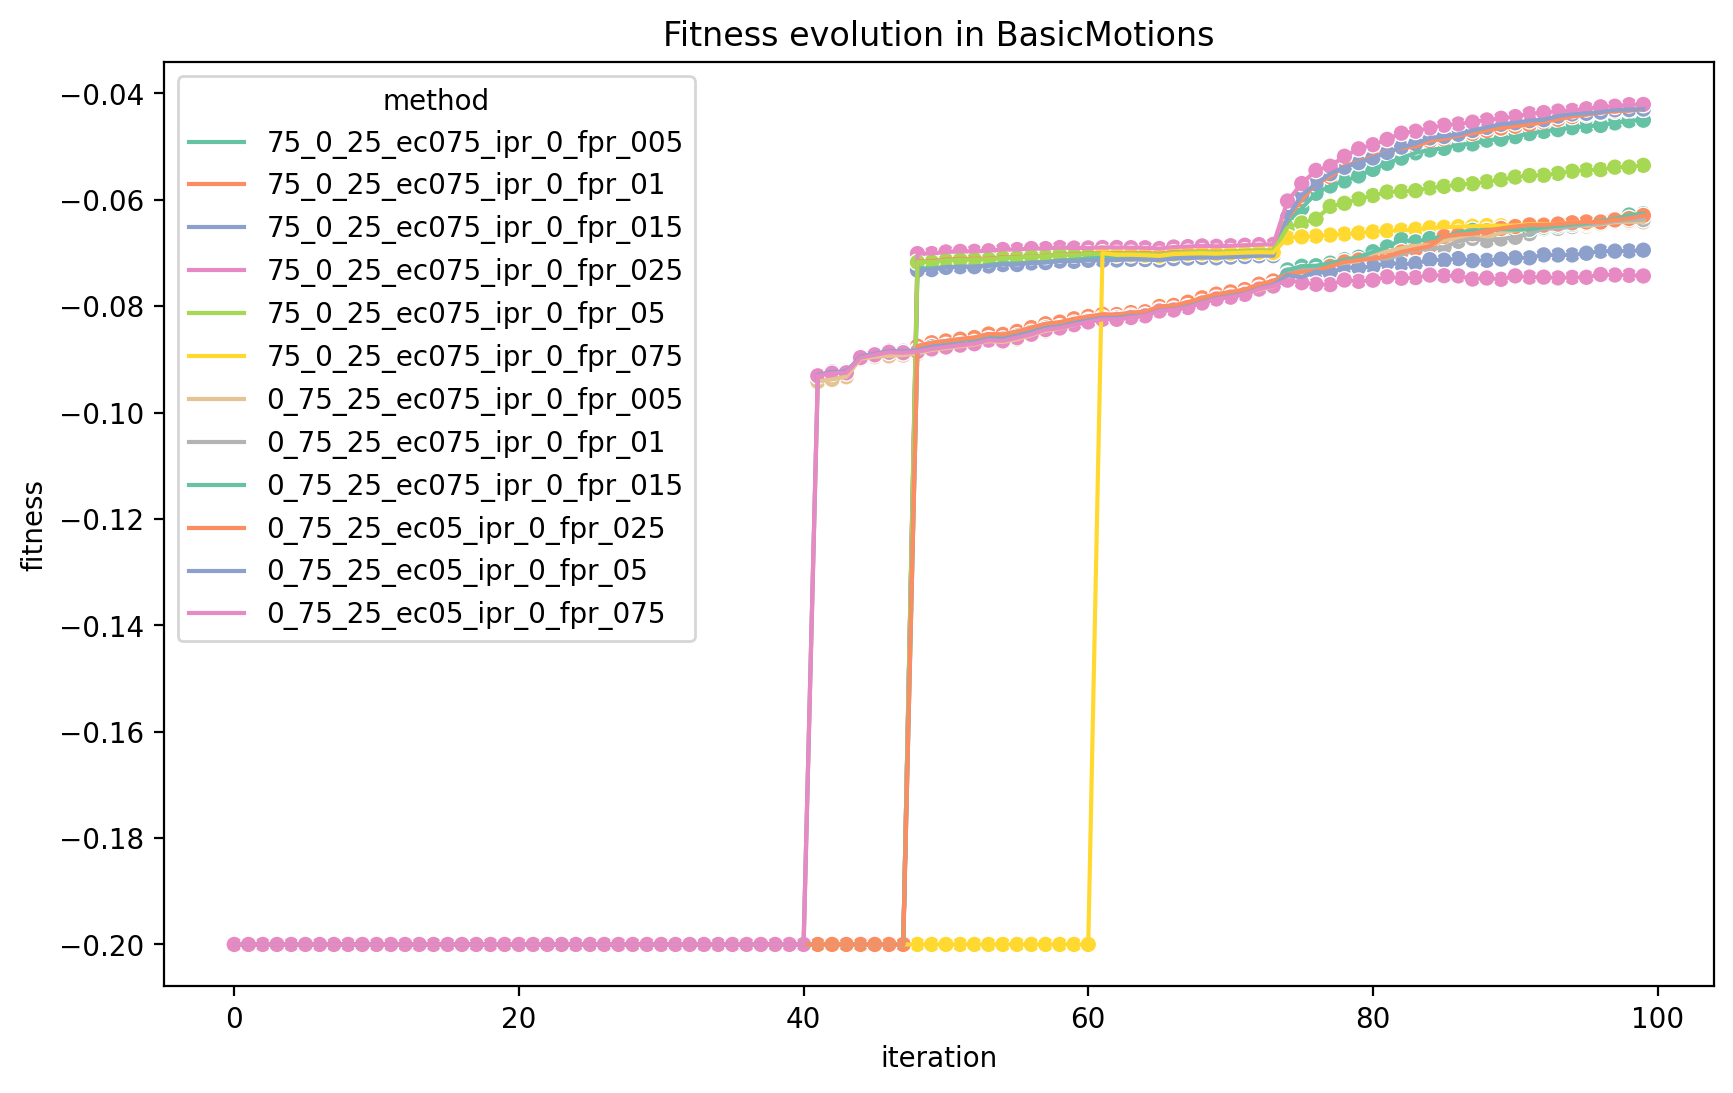

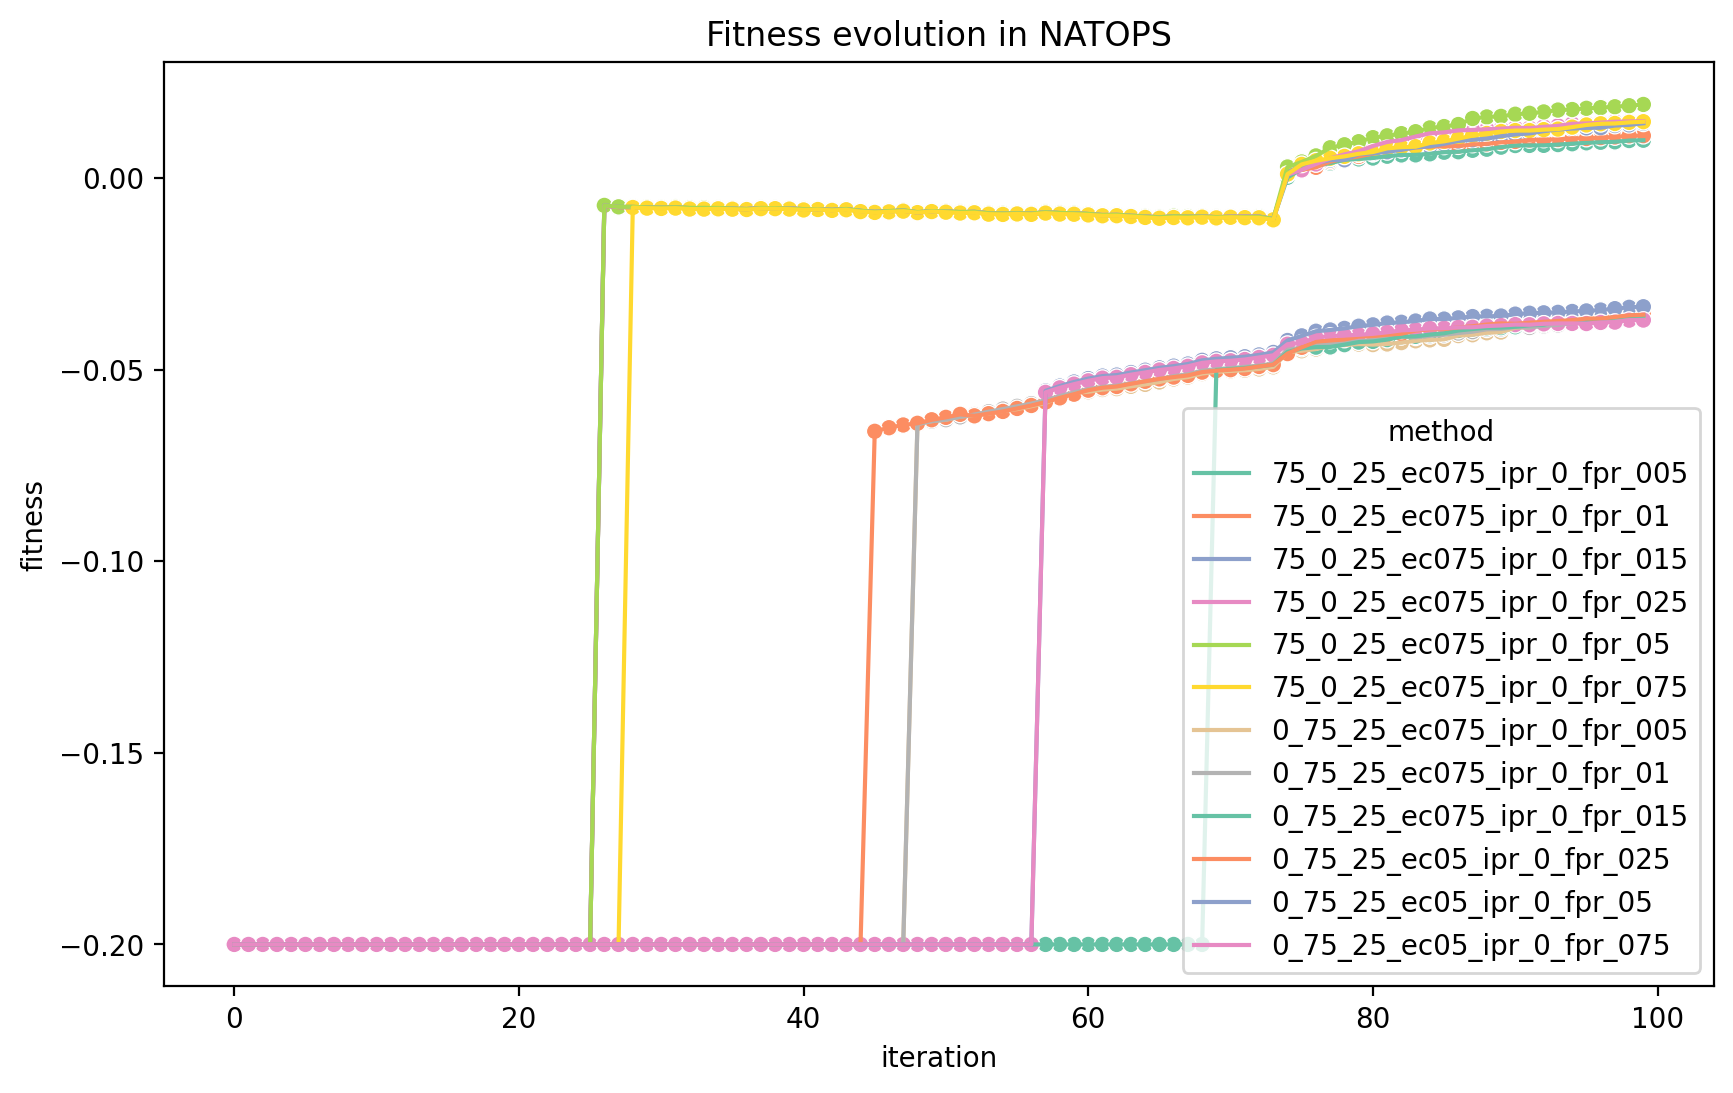

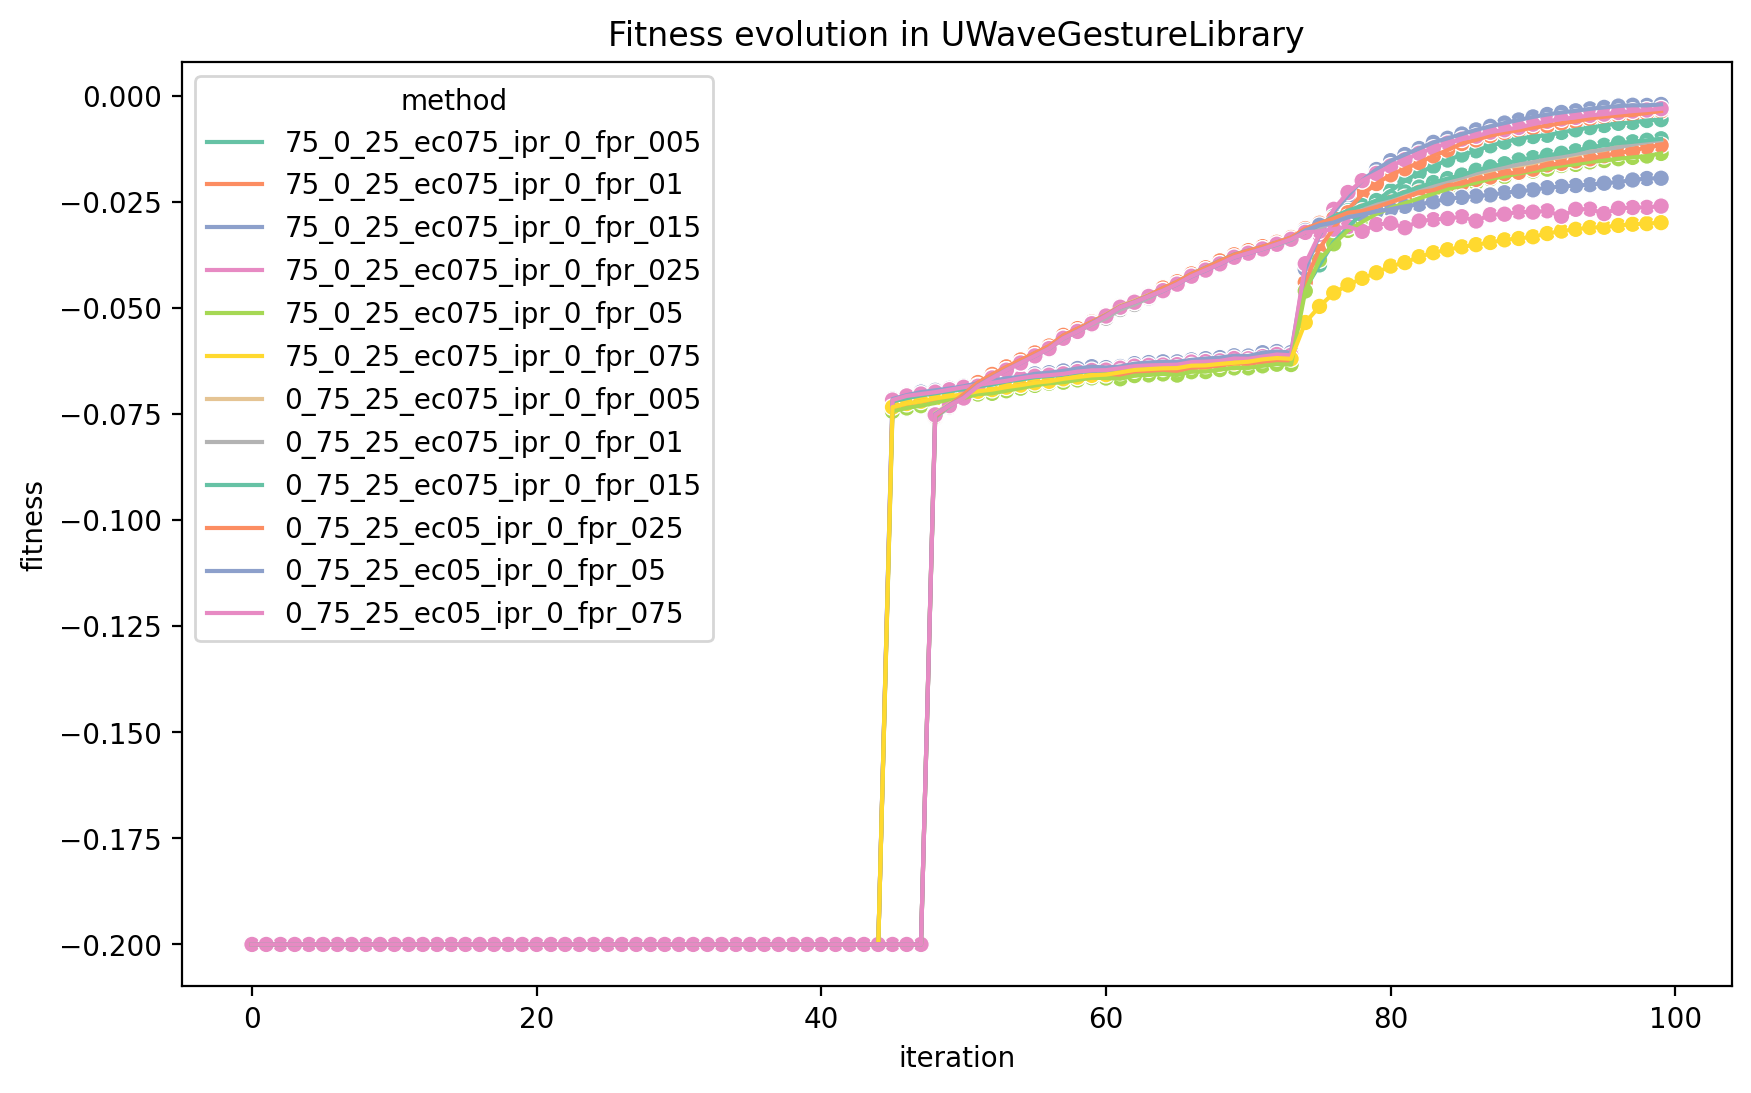

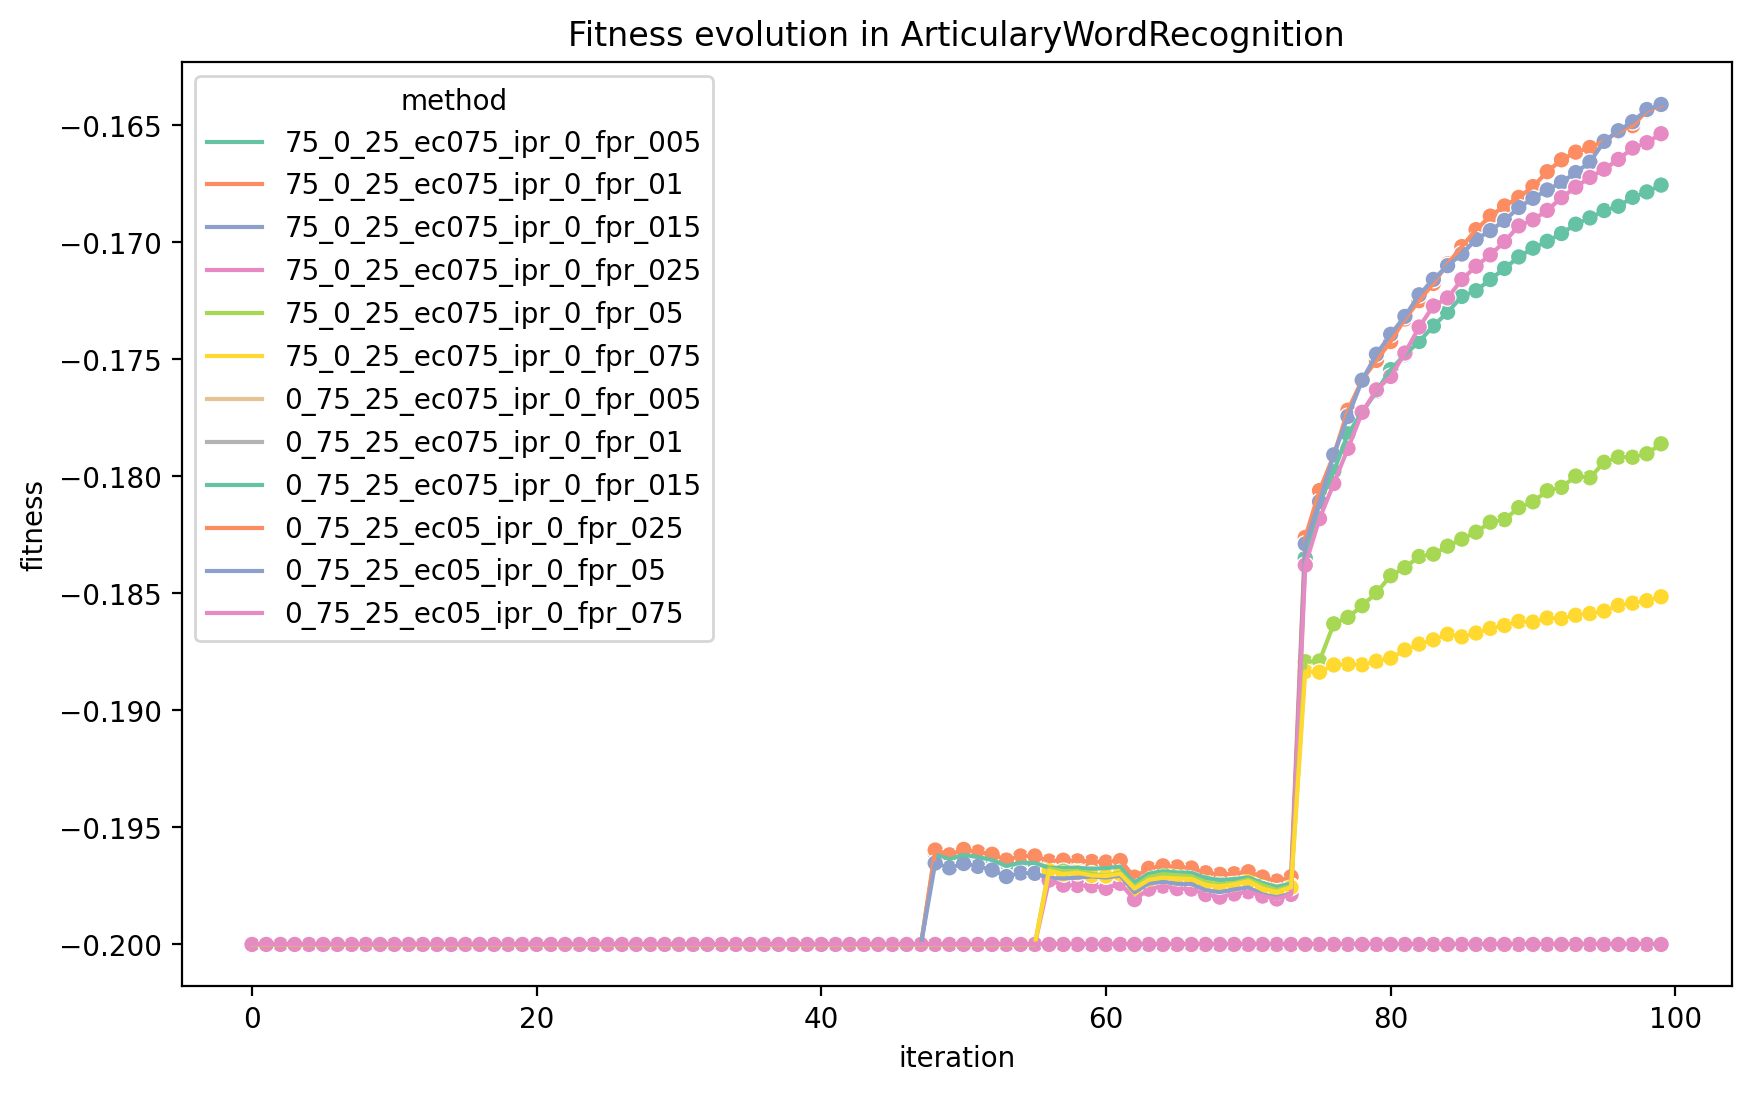

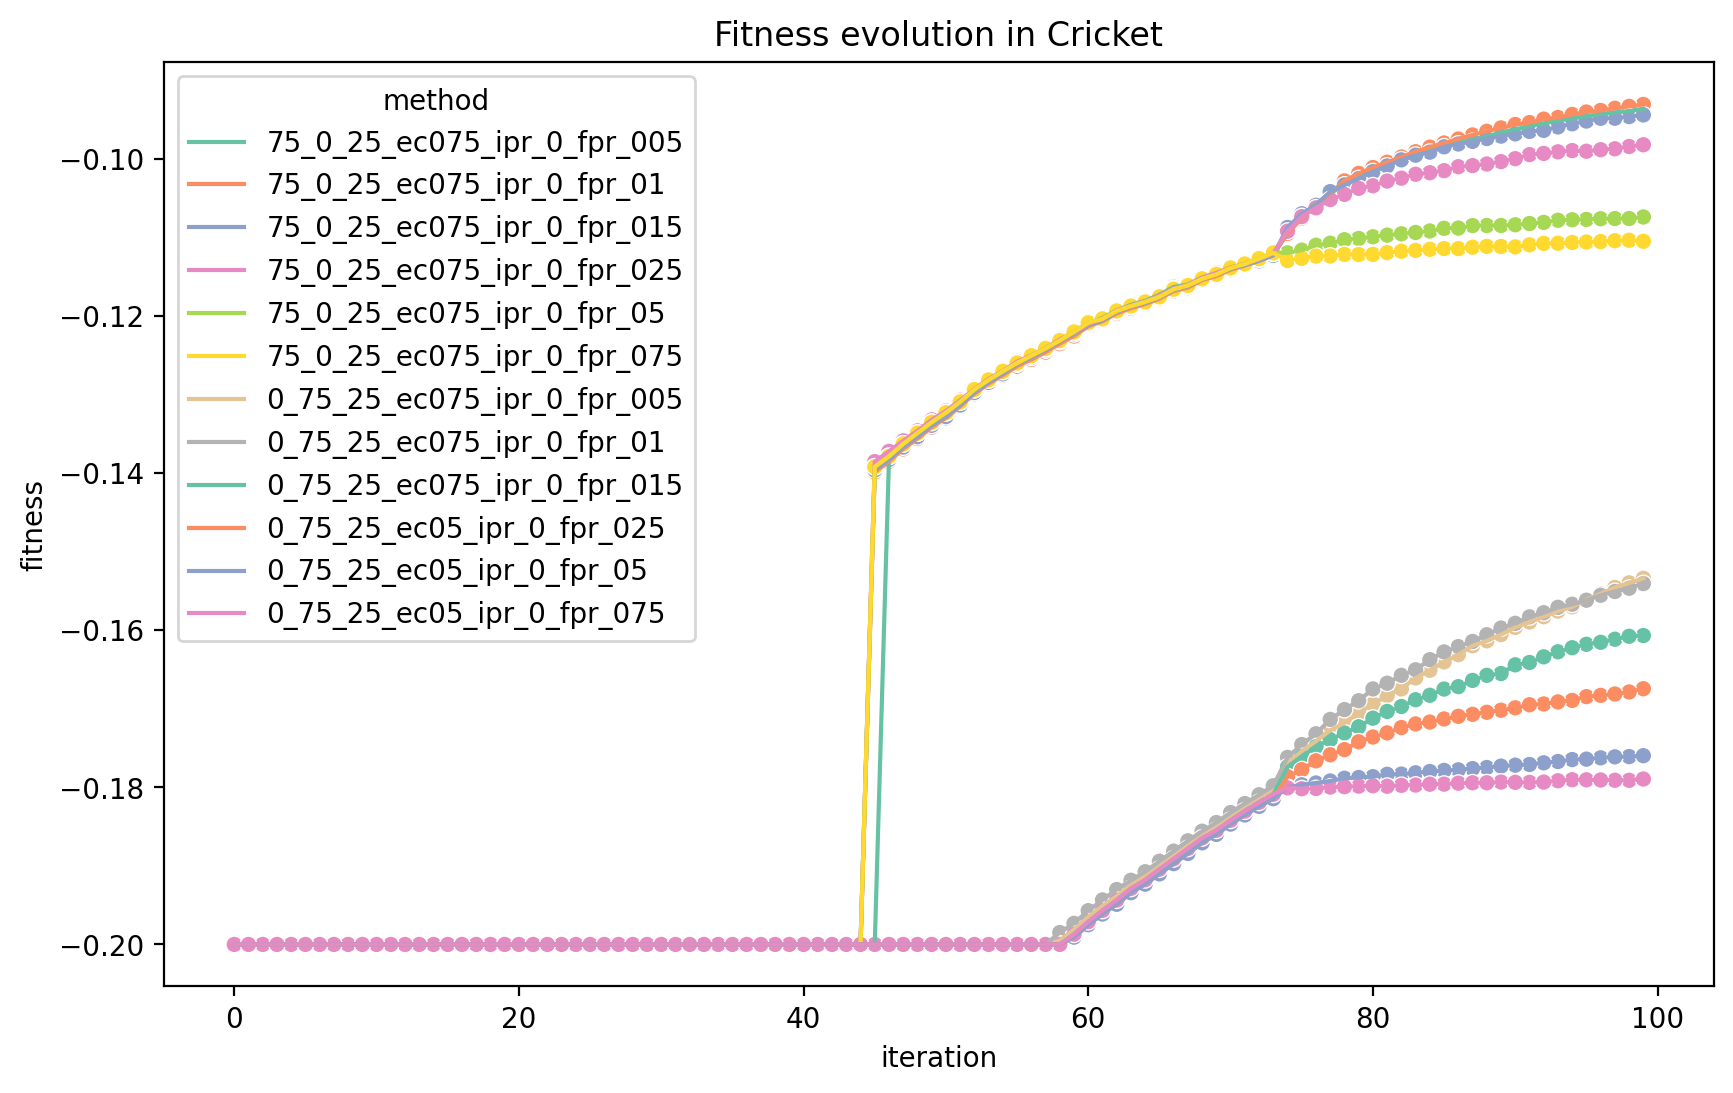

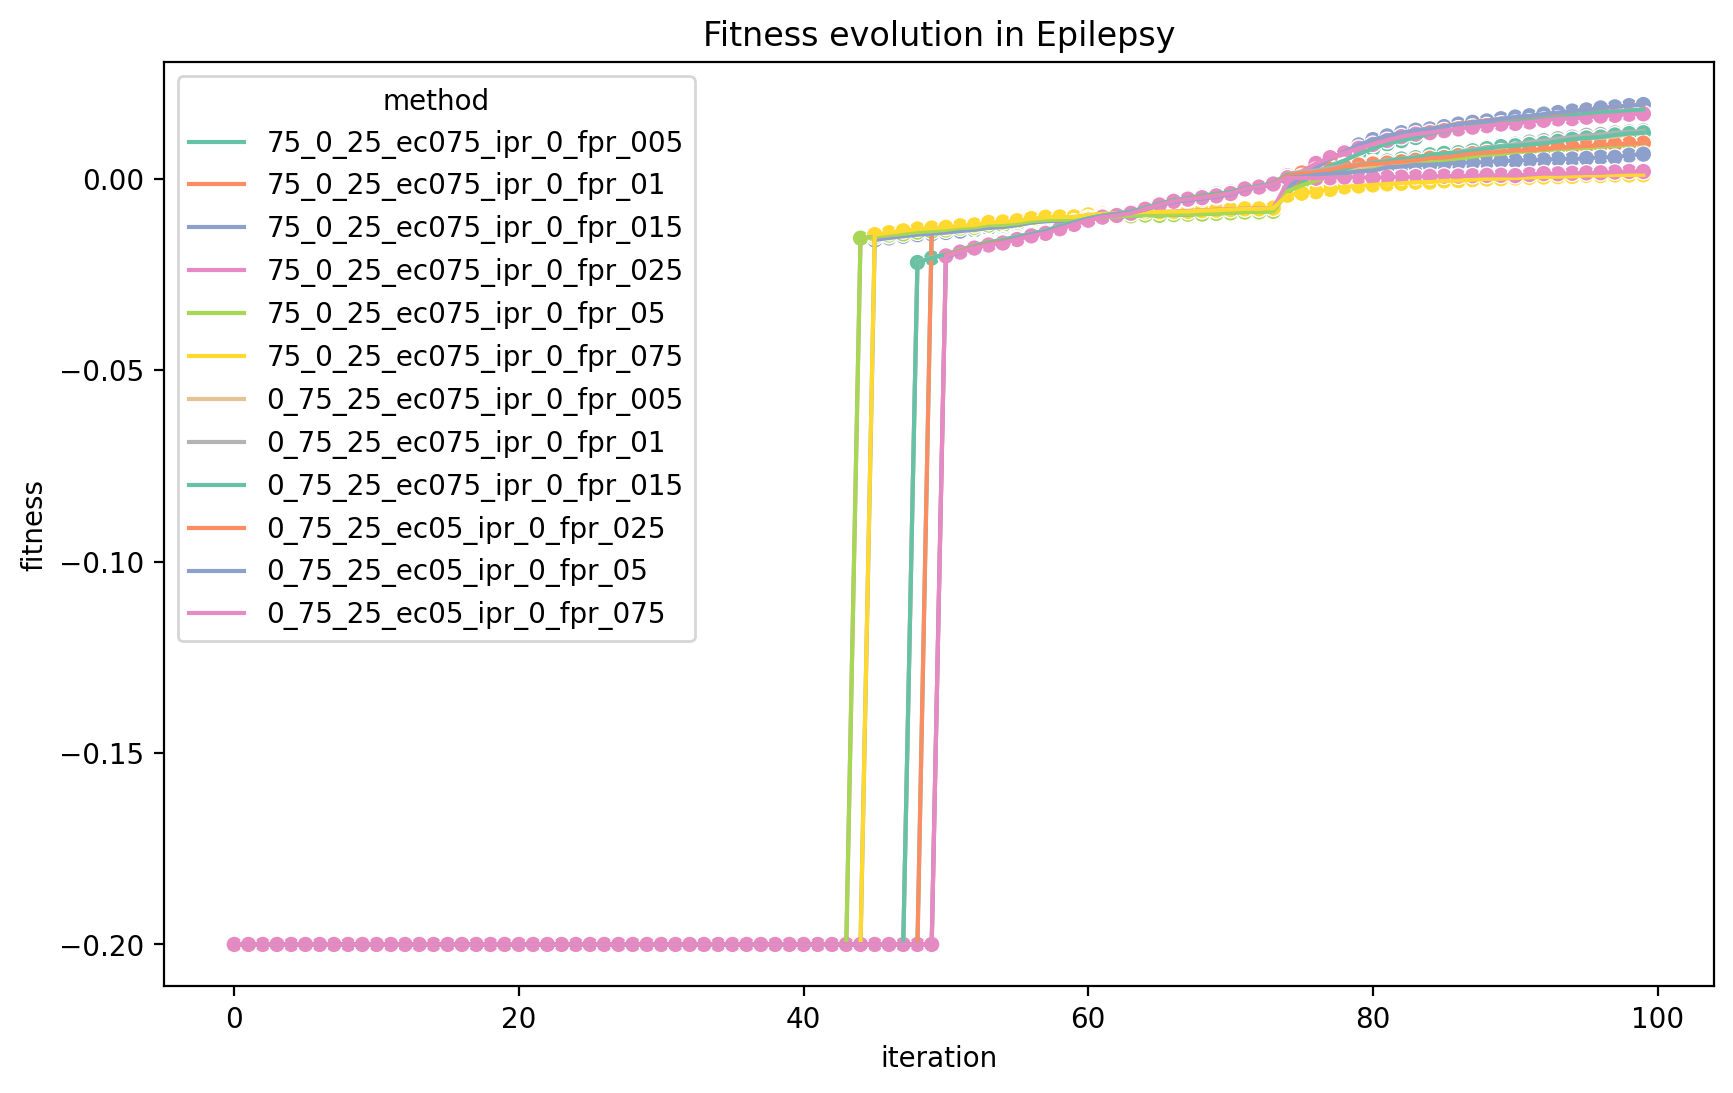

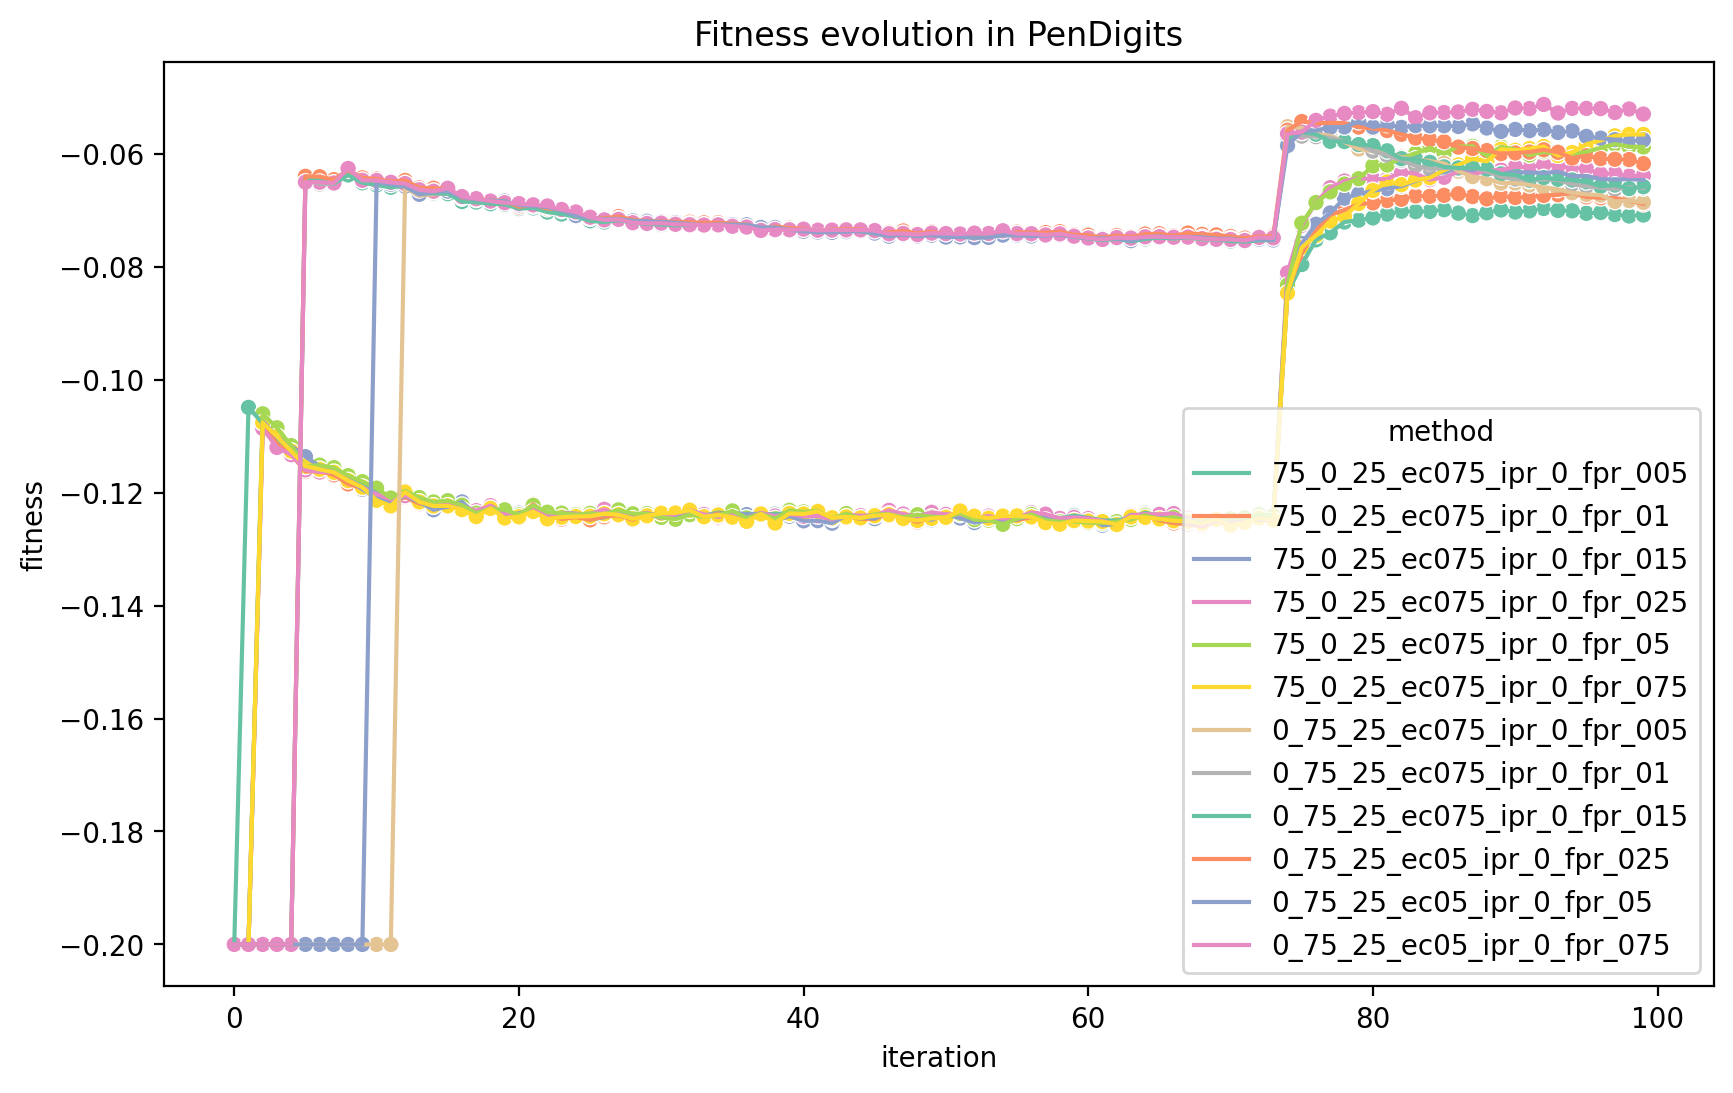

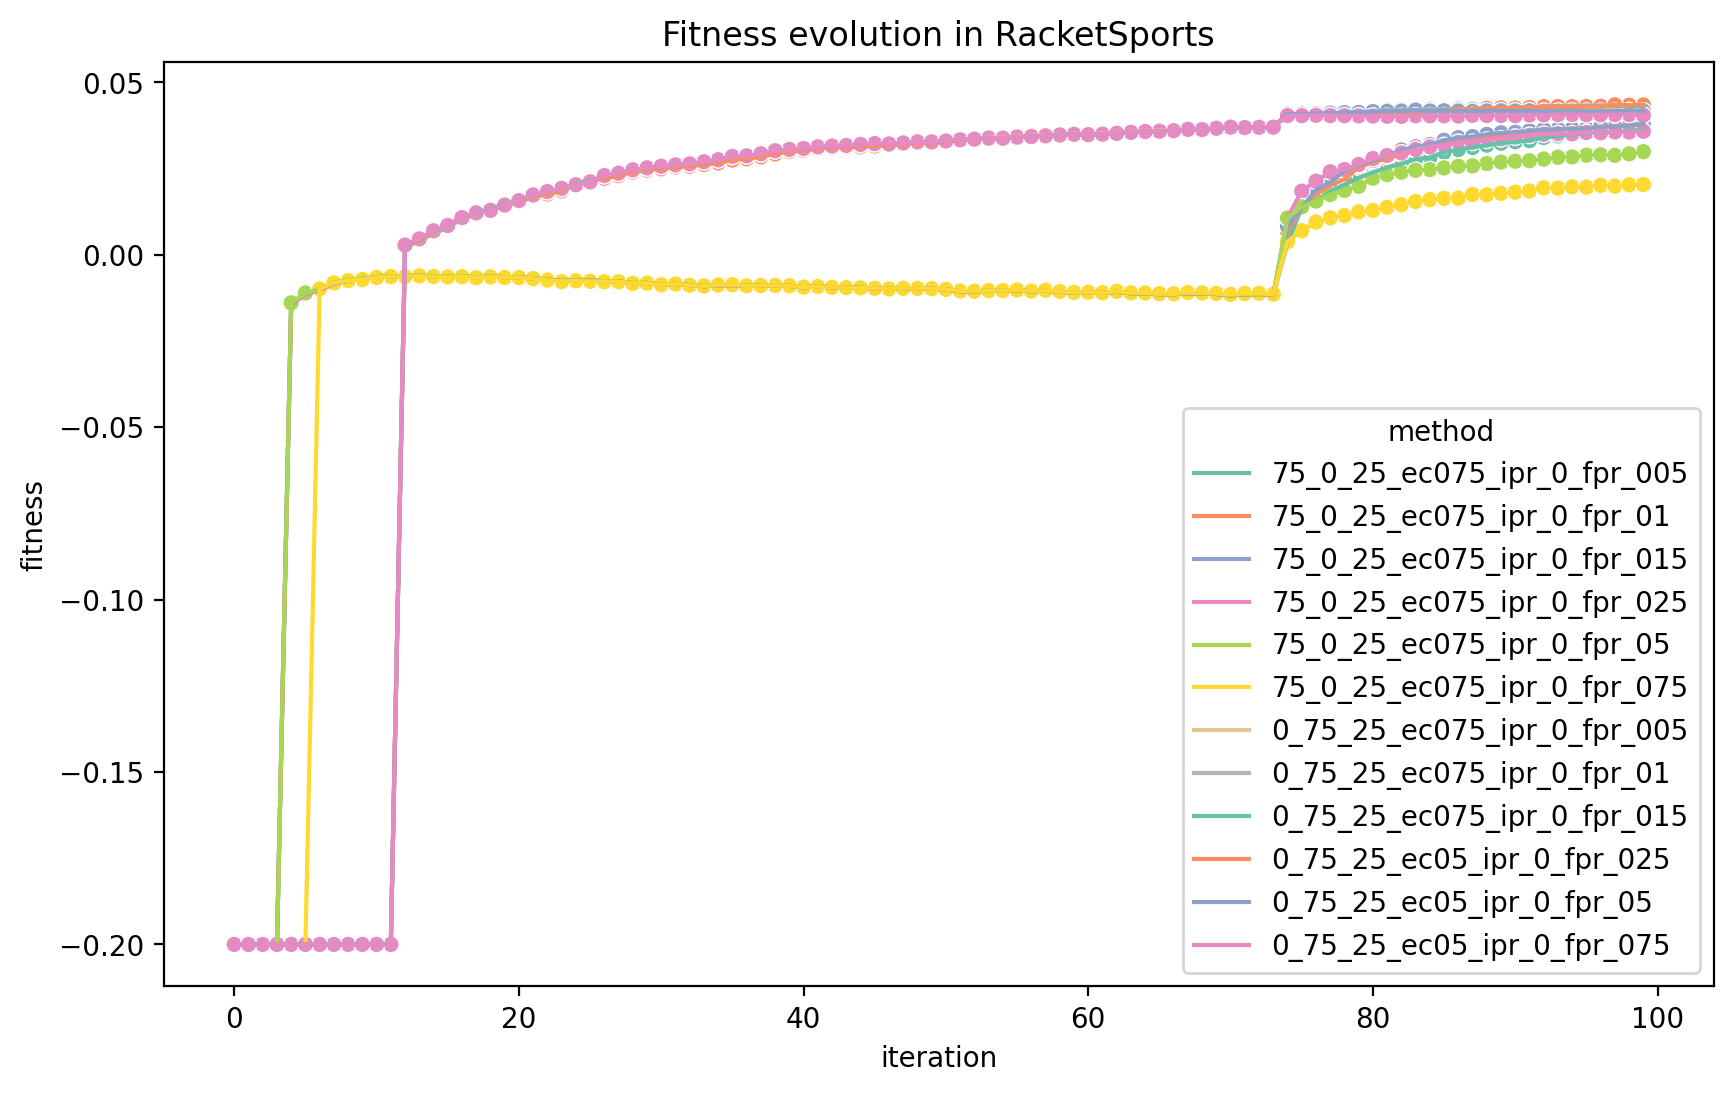

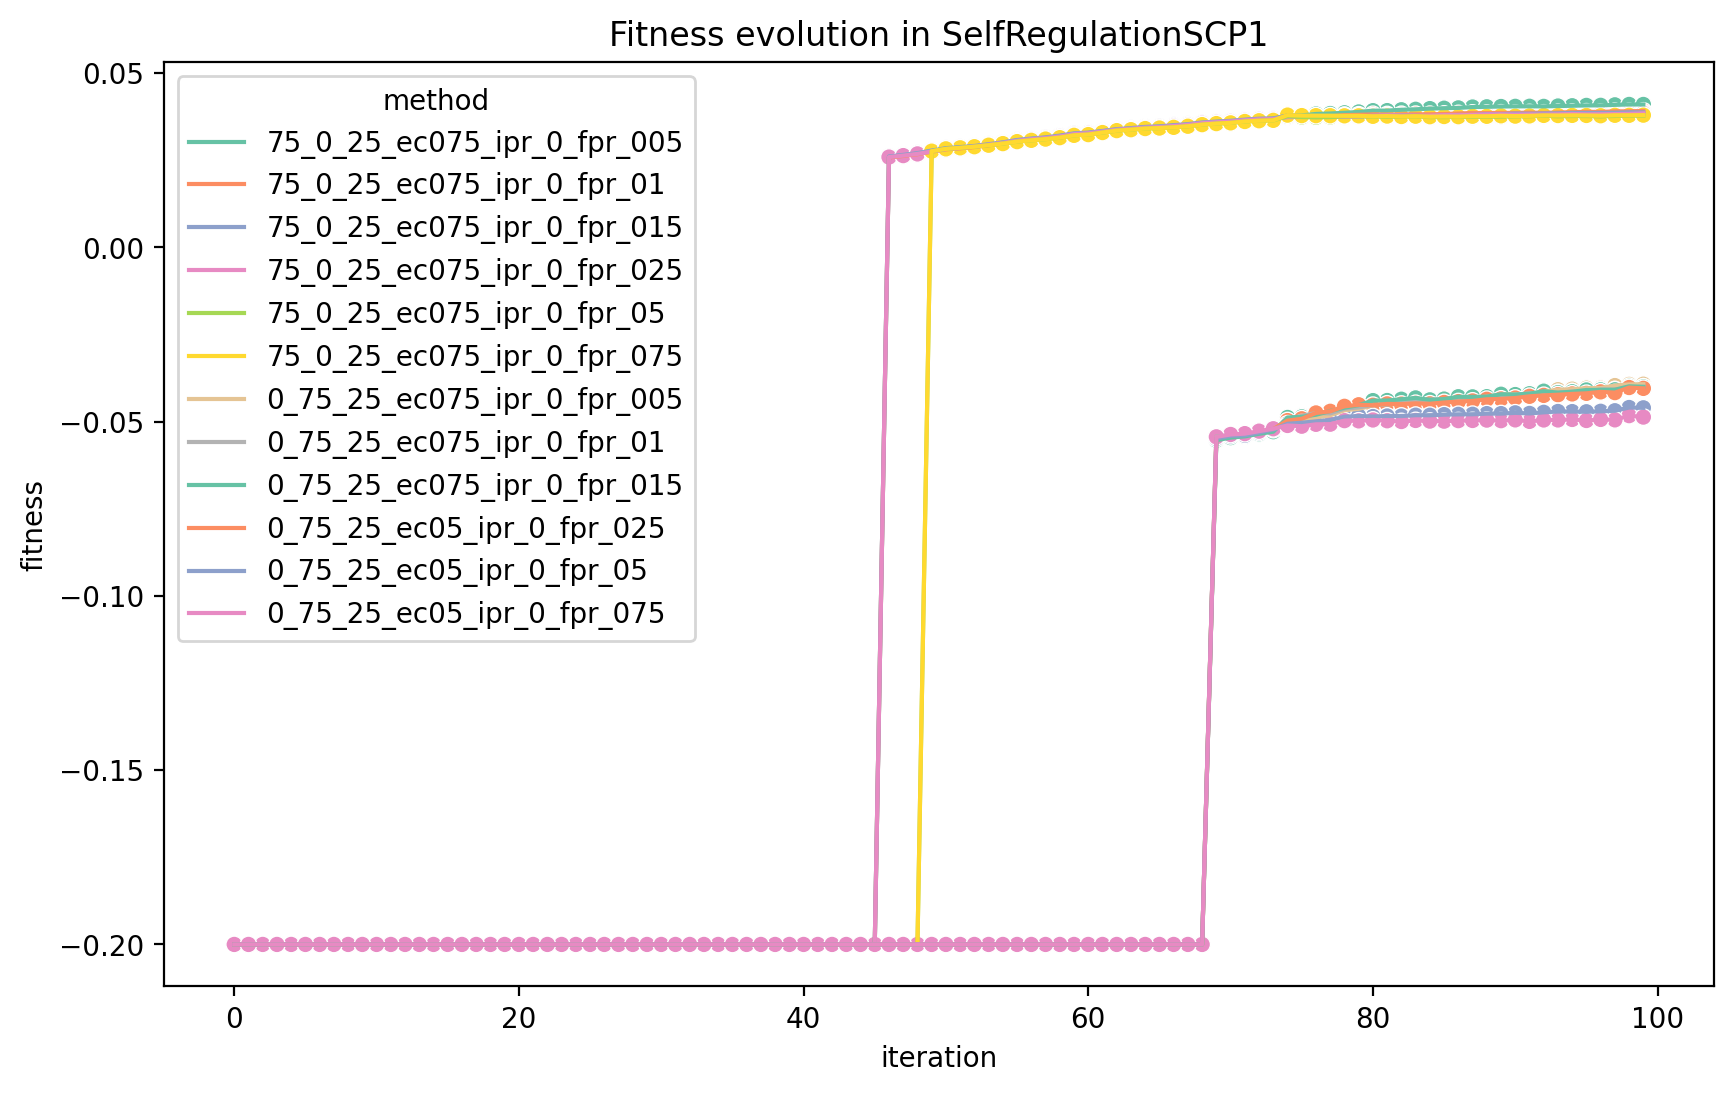

In [37]:
import seaborn as sns

aux_df = all_fitness_curves_df.copy()
methods_order = dict(zip(list(methods.values()), list(range(len(methods)))))

for dataset in DATASETS:
    dataset_fitness_df = aux_df[aux_df['dataset'] == dataset]
    dataset_fitness_mean_df = dataset_fitness_df.groupby(['iteration', 'method'])['fitness'].mean().reset_index()
    dataset_fitness_mean_df['method_ord'] = dataset_fitness_mean_df['method'].map(methods_order)
    dataset_fitness_mean_df = dataset_fitness_mean_df.sort_values('method_ord', ascending=True)
    # Clip values for visualization
    dataset_fitness_mean_df['fitness'].clip(lower=-0.2, upper=None, inplace=True)

    plt.figure(figsize=(10, 6), dpi=200) 
    sns.lineplot(data=dataset_fitness_mean_df, x="iteration", y="fitness", hue="method", palette="Set2").set_title(f'Fitness evolution in {dataset}')
    sns.scatterplot(data=dataset_fitness_mean_df, x="iteration", y="fitness", hue="method", palette="Set2", legend=False)
    plt.show()

In [8]:
dataset_fitness_mean_df

,iteration,method,fitness,method_ord
0,0,multisubspace_gknn_75_0_25_prmut005,-0.200000,0
650,65,multisubspace_gknn_75_0_25_prmut005,0.034113,0
260,26,multisubspace_gknn_75_0_25_prmut005,-0.200000,0
800,80,multisubspace_gknn_75_0_25_prmut005,0.038478,0
640,64,multisubspace_gknn_75_0_25_prmut005,0.033718,0
...,...,...,...,...
629,62,multisubspace_gknn_75_0_25_prmut09,-0.200000,9
639,63,multisubspace_gknn_75_0_25_prmut09,-0.200000,9
649,64,multisubspace_gknn_75_0_25_prmut09,-0.200000,9
669,66,multisubspace_gknn_75_0_25_prmut09,0.035018,9
